# When straight lines aren't enough

We want to generalise the idea of the perceptron for trickier problems. A sensible thing to do is to add some hidden layers of neurons to our perceptron between our input layer and our output layer, constructing a so-called "Multilayer Perceptron" or "MLP" for short. These neurons in the hidden layer work in exactly the same way as those in the input layer. They have some weights and a bias assigned to them, take in inputs and do some linear shift to them.

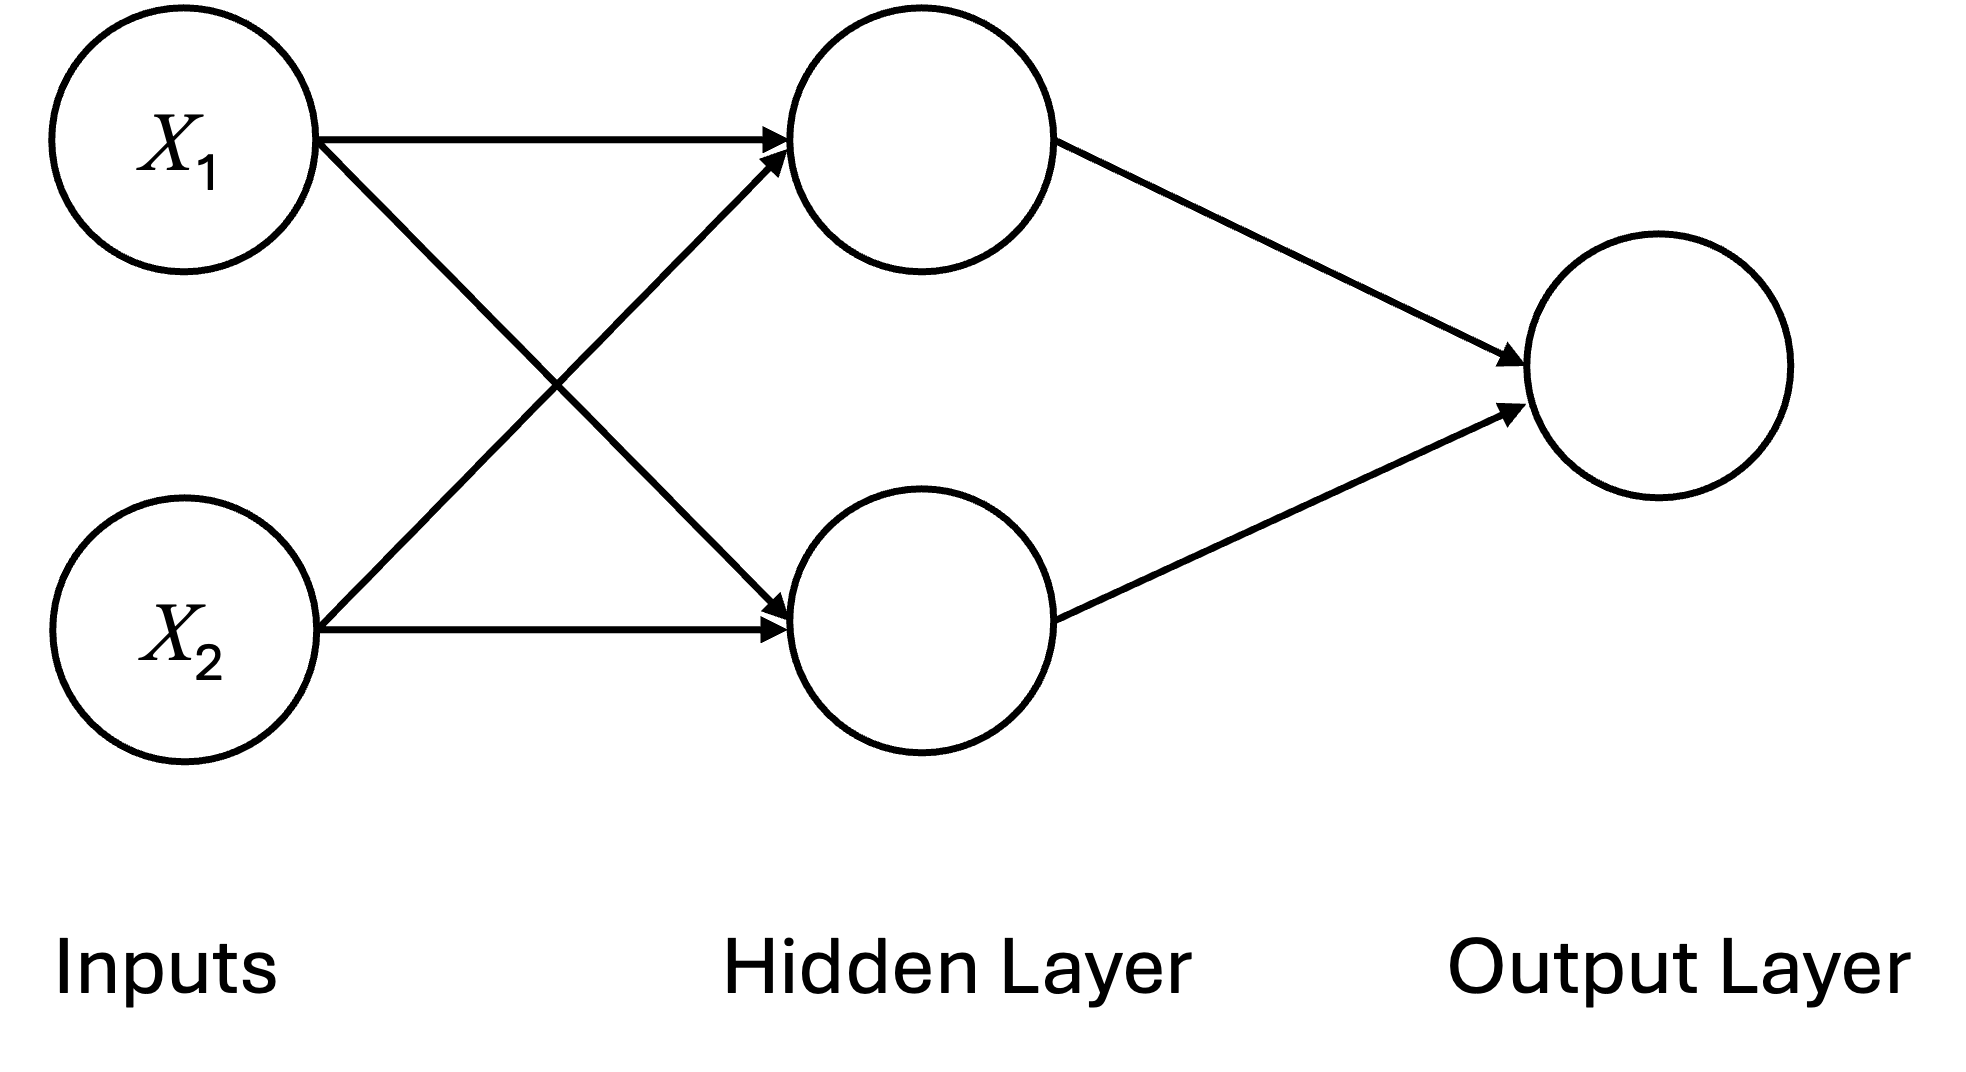

In [1]:
import numpy as np

def toy_MLP(input, weights, bias):
    """
    A toy example of a multilayer perceptron, two inputs x1 and x2, one hidden layer with two neurons, and one output layer with one neuron.
    Manually assigned weights and biases:
    """
    # These just check the inputs, weights and biases are the right shape/size
    assert input.shape == (2,), "Inputs are the wrong shape"
    assert weights.shape == (6,), "Weights are the wrong shape"
    assert bias.shape == (3,), "Biases are the wrong shape"

    # We feed the inputs into the hidden layer and calculate the outputs which then get fed into the output layer
    hidden_layer = [input[0] * weights[0] + input[1] * weights[1] + bias[0],
                    input[0] * weights[2] + input[1] * weights[3] + bias[1]]
    # The output of the hidden layer is then fed into the output layer
    output = hidden_layer[0] * weights[4] + hidden_layer[1] * weights[5] + bias[2]
    # Because we are doing a classification task, we want discrete outputs, so we return 1 if the output is positive and 0 otherwise
    output = 1 if output > 0 else 0
    return output

We can see that when we run this with some weights and biases we get some sense in which we are right or wrong:

In [2]:
# Change the values in the below numpy arrays to test the function with different inputs
weights = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
bias = np.array([0.1, 0.2, 0.3])

XORinputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
XORoutputs = np.array([0, 1, 1, 0])

for i in range(4):
    output = toy_MLP(XORinputs[i], weights, bias)
    print(f"For input: {XORinputs[i]} we wanted to get {XORoutputs[i]} and got {output}")

For input: [0 0] we wanted to get 0 and got 1
For input: [0 1] we wanted to get 1 and got 1
For input: [1 0] we wanted to get 1 and got 1
For input: [1 1] we wanted to get 0 and got 1


Run the code below by changing the values of the weights and biases and see what happens to the decision boundary.

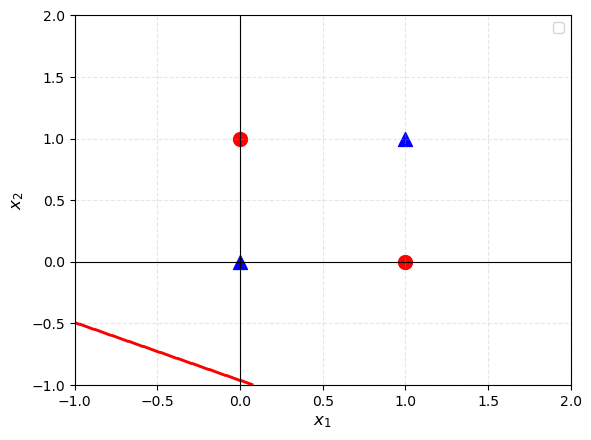

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from itertools import cycle

def decision_boundary_toy_mlp(function = toy_MLP, weights = weights, bias = bias, XORinputs = XORinputs, XORoutputs = XORoutputs, activation_function=None):
    # Plot the decision boundary caluclated from toy_mlp based on weights and biases
    # Includes the XOR data points
    # And then draws a line showing where the decision boundary is

    # Plotting the data points
    for i,input in enumerate(XORinputs):
        if XORoutputs[i]==0:
            plt.scatter(input[0], input[1], color='blue', marker='^', s=100)
        else:
            plt.scatter(input[0], input[1], color='red', marker='o', s=100)

    # Drawing the decision boundaries
    proxy_lines=[]
    color_cycle = cycle(['r', 'g', 'b', 'purple', 'orange', 'black'])
    colors = [next(color_cycle) for _ in range(len(bias))]
    labels=[]
    x1_vals = np.linspace(-1, 2, 500)
    x2_vals = np.linspace(-1, 2, 500)
    x1, x2 = np.meshgrid(x1_vals, x2_vals)
    def vectorized_MLP(x1, x2):
        input_array = np.array([x1, x2])
        if function == toy_MLP:
            return toy_MLP(input_array, weights, bias)
        return function(input_array, weights, bias, activation_function)
    y = np.vectorize(vectorized_MLP)(x1, x2)
    plt.contour(x1, x2, y, levels=[0],linewidths=2,colors=colors[0])
    proxy_lines.append(Line2D([0], [0], color=colors[0], linestyle='-'))

    # Plot settings
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.xlabel('$x_1$', fontsize=12)
    plt.ylabel('$x_2$', fontsize=12)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(proxy_lines, labels)

    # Displaying the plot
    plt.show()

XORinputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
XORoutputs = np.array([0, 1, 1, 0])
weights = np.array([0.1, 0.5, 0.3, 0.4, 0.5, 0.6])
bias = np.array([0.1, 0.2, 0.3])
decision_boundary_toy_mlp(function = toy_MLP, weights = weights, bias = bias, XORinputs = XORinputs, XORoutputs = XORoutputs)

Have a play with different weights and biases to try and make a decision boundary that can distinguish between the two different categories of points. What do you notice about the decision boundary?

What we saw previously is that doing multiple linear transformations to your data is still at the end of the day, a linear transformation. You can think of this in terms of composing functions:

If $ f(x) = w_{1}x + b_{1} $ and $ g(x) = w_{2}x + b_{2} $ are two functions that draw straight lines then we see that:

$f(g(x)) = f(w_{2}x + b_{2}) = w_{1}(w_{2}x + b_{2}) + b_{1} = (w_{1}w_{2})x + (w_{1}b_{2} + b_{1})$

...which is still just a straight line but with slope: $(w_{1}w_{2})$ and intercept $(w_{1}b_{2} + b_{1})$.

So what we need to do is introduce some non-linearity by adding something called an activation function. We have already seen these in some sense when we introduced the "step" by making an output 1 if the input is positive and 0 otherwise.

## Activation functions

There are many different activation functions which have different pros and cons! See below some of them:

### Sigmoid

The first activation function you might encounter, which was used when neural networks were first studied, is called the Sigmoid function. It has the effect of squishing input values between 0 and 1. It is sometimes called the "logistic" function. If you've ever come across logistic regression, then you might understand why!

### ReLU

The second and arguably most common activation function is called the Rectified Linear Unit, or ReLU for short. It returns 0 if the input is negative and returns the input value if the input is positive.

### Tanh

The third activation function we'll mention is tanh (pronounced "tanch" or "hyperbolic tan"), which has the effect of squishing all inputs into outputs in the range -1 to 1. It is the activation function most commonly used in certain types of recurrent neural networks (RNNs) which have applications in time series forecasting and natural language processing.

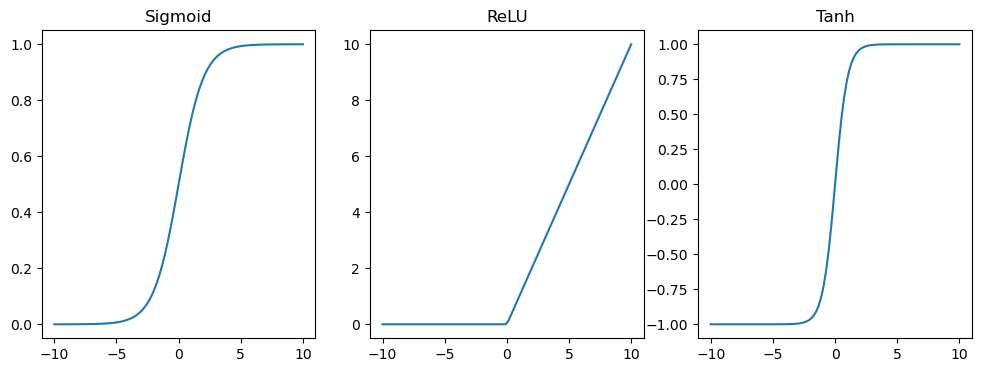

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# ReLU
def relu(x):
    return np.maximum(0, x)
# Tanh
def tanh(x):
    return np.tanh(x)

# Plot the activation functions on three different plots in the same figure
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid')
plt.subplot(1, 3, 2)
plt.plot(x, relu(x))
plt.title('ReLU')
plt.subplot(1, 3, 3)
plt.plot(x, tanh(x))
plt.title('Tanh')
plt.show()

In [5]:
# Recode toy_mlp function with activation functions

def toy_MLP_with_activations(input, weights, bias, activation_function=None):
    """
    A toy example of a multilayer perceptron, two inputs x1 and x2, one hidden layer with two neurons, and one output layer with one neuron.
    Also uses activation functions of your choosing
    Manually assigned weights and biases:
    """
    # These just check the inputs, weights and biases are the right shape/size
    assert input.shape == (2,), "Inputs are the wrong shape"
    assert weights.shape == (6,), "Weights are the wrong shape"
    assert bias.shape == (3,), "Biases are the wrong shape"
    assert activation_function in [None, sigmoid, relu, tanh], "Please choose a valid activation function from [None, sigmoid, relu, tanh]"

    # If the activation function is None, we just use the identity function
    if activation_function is None:
        activation_function = lambda x: x

    # We feed the inputs into the hidden layer and calculate the outputs which then get fed into the output layer
    hidden_layer = [activation_function(input[0] * weights[0] + input[1] * weights[1] + bias[0]),
                    activation_function(input[0] * weights[2] + input[1] * weights[3] + bias[1])]
    # print(hidden_layer[0], hidden_layer[1])

    # The output of the hidden layer is then fed into the output layer
    output = hidden_layer[0] * weights[4] + hidden_layer[1] * weights[5] + bias[2]
    # print(output)
    # Because we are doing a classification task, we want discrete outputs, so we return 1 if the output is positive and 0 otherwise
    output = 1 if output > 0 else 0
    return output

We can now try again to see if, using an activation function, we can get the right shape for the XOR problem:

In [6]:
# Change the values in the below numpy arrays to test the function with different inputs
weights = np.array([1, 1, 1, 1, 2, -1])
bias = np.array([-0.1, -1.8, -2.0])

XORinputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
XORoutputs = np.array([0, 1, 1, 0])

for i in range(4):
    output = toy_MLP_with_activations(XORinputs[i], weights, bias, activation_function=tanh)
    print(f"For input: {XORinputs[i]} we wanted to get {XORoutputs[i]} and got {output}")

For input: [0 0] we wanted to get 0 and got 0
For input: [0 1] we wanted to get 1 and got 1
For input: [1 0] we wanted to get 1 and got 1
For input: [1 1] we wanted to get 0 and got 0


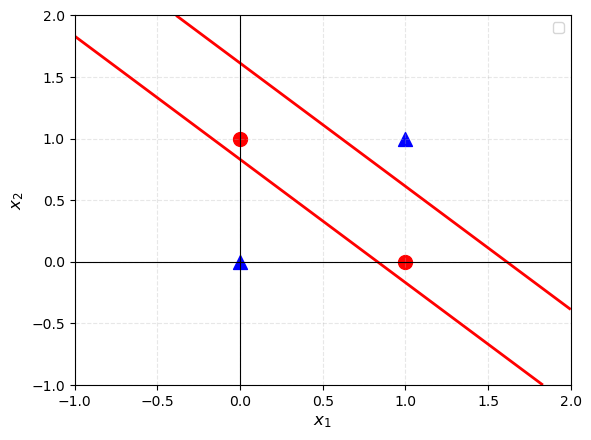

In [10]:
decision_boundary_toy_mlp(function=toy_MLP_with_activations, weights=weights, bias=bias, XORinputs=XORinputs, XORoutputs=XORoutputs, activation_function=tanh)

In two-dimensional(2D) feature space, the decision boundary is a line. In 3D, it becomes a plane, and in higher dimensions, a hyperplane that separates the feature space.

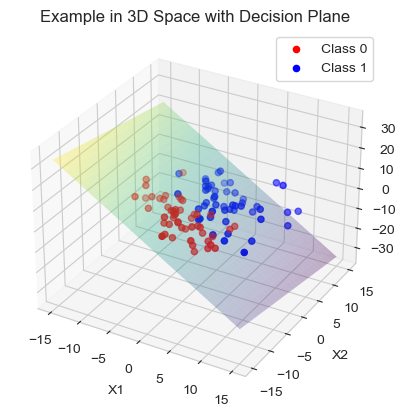